<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/POLINOMIOS%20DE%20LEGENDRE%20JAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POLINOMIOS DE LEGENDRE

a)Graficar en un solo panel los polinomios de legendre, $P_n(x)$ para n=0,...5

Para esto graficamos los polinomios $P_0(x)$,$P_1(x)$,$P_2(x)$,...,$P_5(x)$, con la formula siguiente:

$$P_n(x)=\frac{1}{2^{n}n!}\frac{1}{dx^{n}n!}(x^{2}1)^{n}$$



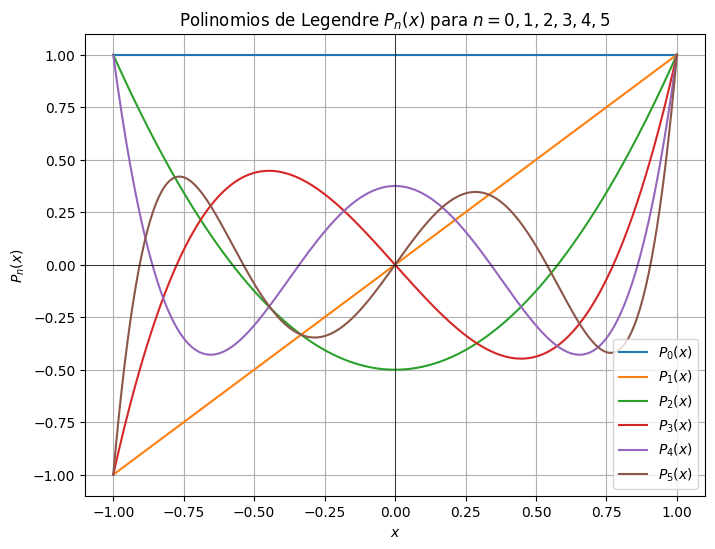

In [11]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
import sympy as sp

# Configurar impresión bonita en SymPy
sp.init_printing(use_unicode=True)

# Variable simbólica
x = sp.symbols('x')

# -------------------------------------------------
# (a) Graficar los polinomios de Legendre P_n(x) para n=0..5
# -------------------------------------------------

n_values = range(6)
x_num = np.linspace(-1, 1, 400)

plt.figure(figsize=(8, 6))
for n in n_values:
 Pn = legendre(n)
 plt.plot(x_num, Pn(x_num), label=f'$P_{n}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n=0,1,2,3,4,5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


  b) Mostrar graficamente que se satisface la relacion, para n=3

  Esto es:

  $$(1 - x^{2}) P'_3(x) = 4xP'_3(x)-4P'_4(x)$$

  se utilizan los polinomios $P_3(x)$ y $P_4(x)$ y $P_3´(x)$ obteniendo así de la expresión anterior

  Llamaremos LHS a:


$$ (1-x^2) P_3´ (x) = (1-x^2) (\frac{15}{2} x^2 - \frac{3}{2}) $$

y RHS a:
$$ 4xP_3(x) - 4P_4(x) = 4x \cdot (\frac{5}{2} x^3 - \frac{3}{2}) - 4 \cdot \frac{1}{8}(35 x^4 - 30x^2 +3) $$


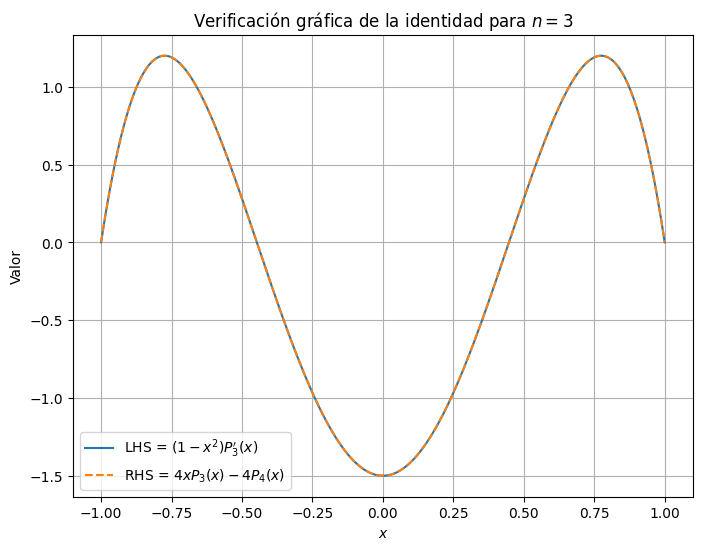

In [6]:
# (b) Mostrar gráficamente que se cumple la relación para n=3:
# (1 - x^2) P'_n(x) = (n+1)x P_n(x) - (n+1) P_{n+1}(x)
# -------------------------------------------------

n = 3
Pn_expr = sp.legendre(n, x)
Pn1_expr = sp.legendre(n + 1, x)
dPn_dx = sp.diff(Pn_expr, x)

lhs = (1 - x**2) * dPn_dx
rhs = (n + 1) * x * Pn_expr - (n + 1) * Pn1_expr

# Lambdify para graficar las expresiones
lhs_func = sp.lambdify(x, lhs, 'numpy')
rhs_func = sp.lambdify(x, rhs, 'numpy')

plt.figure(figsize=(8, 6))
plt.plot(x_num, lhs_func(x_num), label='LHS = $(1 - x^2)P_3\'(x)$')
plt.plot(x_num, rhs_func(x_num), '--', label='RHS = $4xP_3(x) - 4P_4(x)$')
plt.title('Verificación gráfica de la identidad para $n=3$')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

c) Mostrar algebraicamente que se satisface la relacion para n=3

Al desarrollar las ecuaciones anteriormente definidas como LHS y RHS, obtenemos lo siguiente:


$$LHS = RHS$$

d) Mostrar algebraicamente que se satisface la relacion para n=3

Se tiene con n=3 lo siguiente:

$$ 4P_{4}(x) - (7)x P_n(3) +  3P_{2}(x) = 0$$

Se calculan los polinomios necesarios obteniendo:

$$   0x^4 +  0x^2 +  0 =  0 $$



In [7]:
# (c) Mostrar algebraicamente que se cumple la misma relación para n=3
# -------------------------------------------------

print("\n--- (c) Verificación algebraica de la identidad (n=3) ---\n")
print("LHS = (1 - x^2) * P'_3(x)")
sp.pprint(lhs)
print("\nRHS = 4x*P_3(x) - 4*P_4(x)")
sp.pprint(rhs)

# Simplificamos LHS - RHS (debe ser 0)
simpl_diff = sp.simplify(lhs - rhs)
print("\nSimplificación de LHS - RHS:")
sp.pprint(simpl_diff)

# -------------------------------------------------
# (d) Mostrar algebraicamente que se cumple:
# (n+1) P_{n+1}(x) - (2n + 1)x P_n(x) + n P_{n-1}(x) = 0
# para n = 3
# -------------------------------------------------

n = 3
Pn_3 = sp.legendre(n, x)
Pn_2 = sp.legendre(n - 1, x)
Pn_4 = sp.legendre(n + 1, x)

expr = (n + 1) * Pn_4 - (2 * n + 1) * x * Pn_3 + n * Pn_2

print("\n--- (d) Verificación algebraica de la segunda identidad (n=3) ---\n")
sp.pprint(expr)

simpl_expr = sp.simplify(expr)
print("\nSimplificación de la expresión:")
sp.pprint(simpl_expr)



--- (c) Verificación algebraica de la identidad (n=3) ---

LHS = (1 - x^2) * P'_3(x)
         ⎛    2    ⎞
⎛     2⎞ ⎜15⋅x    3⎟
⎝1 - x ⎠⋅⎜───── - ─⎟
         ⎝  2     2⎠

RHS = 4x*P_3(x) - 4*P_4(x)
      4               ⎛   3      ⎞    
  35⋅x        2       ⎜5⋅x    3⋅x⎟   3
- ───── + 15⋅x  + 4⋅x⋅⎜──── - ───⎟ - ─
    2                 ⎝ 2      2 ⎠   2

Simplificación de LHS - RHS:
0

--- (d) Verificación algebraica de la segunda identidad (n=3) ---

    4       2       ⎛   3      ⎞
35⋅x    21⋅x        ⎜5⋅x    3⋅x⎟
───── - ───── - 7⋅x⋅⎜──── - ───⎟
  2       2         ⎝ 2      2 ⎠

Simplificación de la expresión:
0


e) Muestre que cumple la fórmula de Rodrigues para n=0..5

se verifica la formula para n=0 hasta 5

$$P_n(x)=\frac{1}{2^{n}n!}\frac{1}{dx^{n}n!}(x^{2}1)^{n}$$

In [10]:
# (e) Verificar la fórmula de Rodrigues para n=0..5
# P_n(x) = (1/(2^n * n!)) * d^n/dx^n [(x^2 - 1)^n]
# -------------------------------------------------

def rodrigues_Pn(n, x):
 expr = (x**2 - 1)**n
# (e) Verificar la fórmula de Rodrigues para n=0..5
# P_n(x) = (1/(2^n * n!)) * d^n/dx^n [(x^2 - 1)^n]
# -------------------------------------------------

import sympy as sp

def rodrigues_Pn(n, x):
    expr = (x**2 - 1)**n
    deriv = sp.diff(expr, x, n)
    coef = 1 / (2**n * sp.factorial(n))
    return coef * deriv

print("\n--- (e) Verificación de la fórmula de Rodrigues ---\n")

x = sp.Symbol('x') # Define 'x' as a symbolic variable

for n in range(6):
    Pn_legendre = sp.legendre(n, x)
    Pn_rodrigues = sp.simplify(rodrigues_Pn(n, x))

    print(f"\nPara n = {n}")
    print("Polinomio de Legendre (SymPy):")
    sp.pprint(Pn_legendre)

    print("Polinomio vía fórmula de Rodrigues:")
    sp.pprint(Pn_rodrigues)

    is_equal = sp.simplify(Pn_legendre - Pn_rodrigues) == 0
    print(f"¿Son iguales? -> {'Sí' if is_equal else 'No'}")

for n in range(6):
 Pn_legendre = sp.legendre(n, x)
Pn_rodrigues = sp.simplify(rodrigues_Pn(n, x))

print(f"\nPara n = {n}")
print("Polinomio de Legendre (SymPy):")
sp.pprint(Pn_legendre)

print("Polinomio vía fórmula de Rodrigues:")
sp.pprint(Pn_rodrigues)

is_equal = sp.simplify(Pn_legendre - Pn_rodrigues) == 0
print(f"¿Son iguales? -> {'Sí' if is_equal else 'No'}")


--- (e) Verificación de la fórmula de Rodrigues ---


Para n = 0
Polinomio de Legendre (SymPy):
1
Polinomio vía fórmula de Rodrigues:
1
¿Son iguales? -> Sí

Para n = 1
Polinomio de Legendre (SymPy):
x
Polinomio vía fórmula de Rodrigues:
x
¿Son iguales? -> Sí

Para n = 2
Polinomio de Legendre (SymPy):
   2    
3⋅x    1
──── - ─
 2     2
Polinomio vía fórmula de Rodrigues:
   2    
3⋅x    1
──── - ─
 2     2
¿Son iguales? -> Sí

Para n = 3
Polinomio de Legendre (SymPy):
   3      
5⋅x    3⋅x
──── - ───
 2      2 
Polinomio vía fórmula de Rodrigues:
  ⎛   2    ⎞
x⋅⎝5⋅x  - 3⎠
────────────
     2      
¿Son iguales? -> Sí

Para n = 4
Polinomio de Legendre (SymPy):
    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8
Polinomio vía fórmula de Rodrigues:
    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8
¿Son iguales? -> Sí

Para n = 5
Polinomio de Legendre (SymPy):
    5       3       
63⋅x    35⋅x    15⋅x
───── - ───── + ────
  8       4      8  
Poli